# TASK 1

The purpose of this jupyter notebook is to show you (researchers) on how to use the jupiter.py module and analyse any present trends within the data. We'll use the (jupiter_database).db file as an example.  

In [1]:
from jupiter import Moons 
#First, we import the class from our module 

jupiter_moons = Moons('jupiter_database.db')
#Then, we load in the data by calling the Moons Class and then stating the file name of the db file. 
# "jupiter_moons" is considered a particular instance for the Moons class. 
#From now on, we should use the "jupiter_moons" and call different types of methods to manipulate and find existing trends. 

In [2]:
jupiter_moons.basic_dataset_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   moon             56 non-null     object 
 1   period_days      56 non-null     float64
 2   distance_km      56 non-null     float64
 3   radius_km        56 non-null     float64
 4   mag              53 non-null     float64
 5   mass_kg          6 non-null      float64
 6   group            56 non-null     object 
 7   ecc              56 non-null     float64
 8   inclination_deg  56 non-null     float64
dtypes: float64(7), object(2)
memory usage: 4.1+ KB
None


This method allows us to check how many non-null counts and the data type of the particular column. 
For example, for mass_kg there are 6 non-null counts, which means that there are 50 other counts which are null. Dtype is float64 is a decimal floating-point numbering format that occupies 8 bytes. 

In [3]:
jupiter_moons.num_null_values()

The number of null values for each columns are


moon                0
period_days         0
distance_km         0
radius_km           0
mag                 3
mass_kg            50
group               0
ecc                 0
inclination_deg     0
dtype: int64

This Method is just a very quick way to determine how many null values are there in each columns. This method proves useful if there a lot of entries (eg 1000000 entries) as compared to the previous method which will need simple calculations to determine the null count. 

In [4]:
jupiter_moons.calculate_missing_percentage()

moon                0.000000
period_days         0.000000
distance_km         0.000000
radius_km           0.000000
mag                 5.357143
mass_kg            89.285714
group               0.000000
ecc                 0.000000
inclination_deg     0.000000
dtype: float64

This method shows us the percentage of values which are missing for each column 

In [5]:
jupiter_moons.drop_missing_values(axis=0, inplace=False)

,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
2,Amalthea,0.498000,181400.0,83.5,14.10,2.080000e+18,Inner,0.003190,0.37
8,Callisto,16.689018,1882700.0,2410.3,5.65,1.075938e+23,Galilean,0.007400,2.02
22,Europa,3.551181,670900.0,1560.8,5.29,4.799844e+22,Galilean,0.009000,1.79
24,Ganymede,7.150000,1070400.0,2634.1,4.61,1.481900e+23,Galilean,0.001300,2.20
30,Himalia,248.000000,11388690.0,85.0,14.60,4.200000e+18,Himalia,0.153786,29.90
31,Io,1.750000,421700.0,1821.6,5.02,8.931938e+22,Galilean,0.004100,2.20


Sometimes, we would want to filter out some of the NA values.

The parameters in the method are described as follow: 
axis = 0 ( means to delete rows ) axis = 1 ( means to delete columns ) . By default, it is set to axis=0. 
inplace = False ( means to return a new DataFrame with missing values dropped ) , inplace = True ( means to modify the original Dataset. By default, it is set ot inplace=False. 

If it's by default, you can choose not to enter anything if you're satisfied with the parameter choice. 

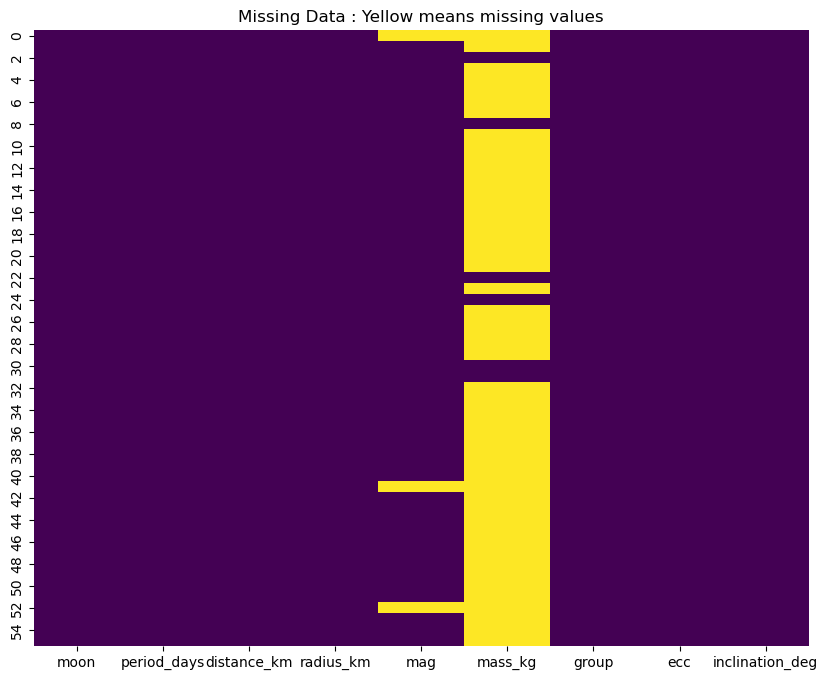

In [6]:
jupiter_moons.visualise_missing_data()

Method also allows us to visualise where the missing data could be at. 

C:\Users\tanwe\Jupiter_Moons_Project\jupiter.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = self.data.corr()


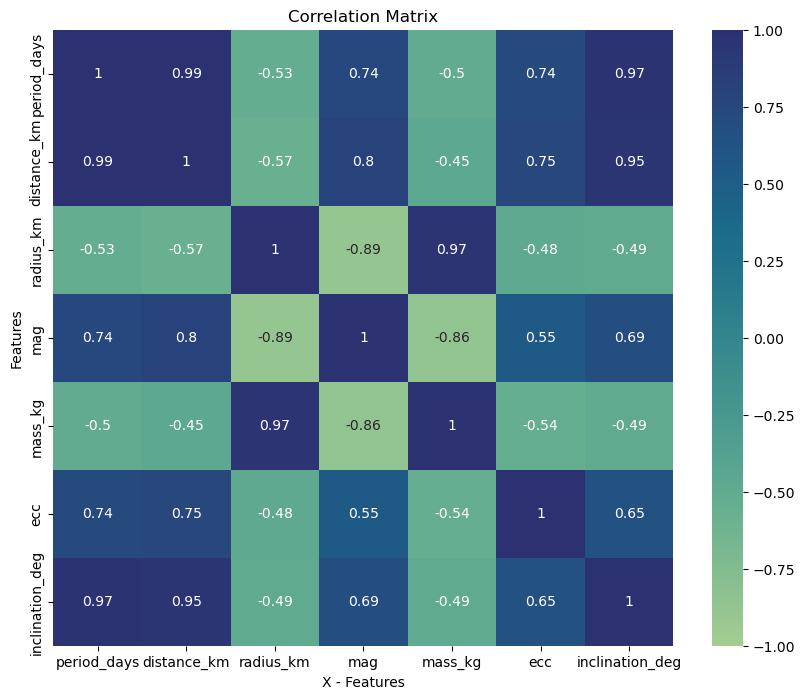

In [7]:
jupiter_moons.visualise_corr()

If we have no absolute clue on what relations the features have to one another, we can use the "visualiser_corr" method to determine the different types of relations each feature has to one another. 

This method is good if we are oblivious to the current dataset and need help with the inputs for more intricate graphs. 

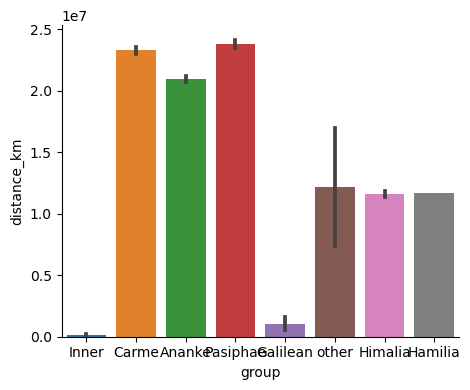

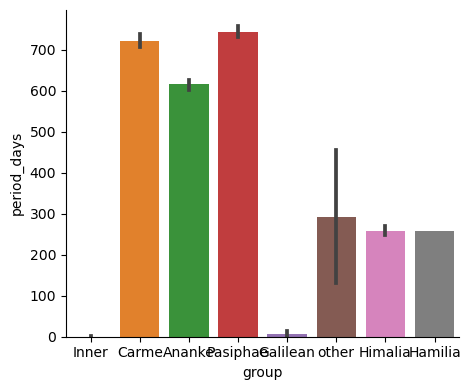

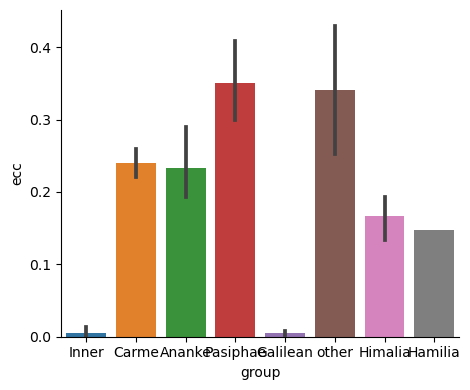

In [8]:
y_list = ["distance_km","period_days","ecc"]

jupiter_moons.create_mult_catplots(x="group",y_list=y_list,kind="bar")

In common datasets, all entries are labelled into certain categories. In this case, it's categorised using the "group" columns.
The "create_mult_catplots" allows us to see the quantity of each features corresponding to the different type of moon present around Jupiter

The function of the paramters are as follows: 
x = "insert_category_column_name"
y_list = [insert_list_of_features]
kind is the way the data is presented in the graph. I chose bar because it looked the easiest to analyse it. 

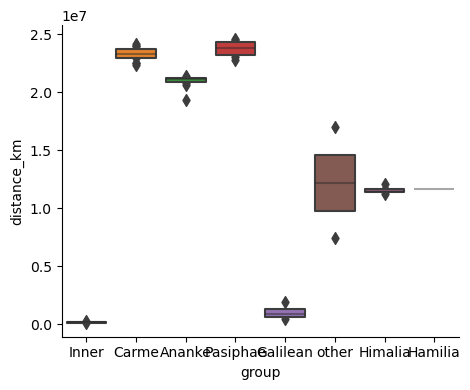

In [9]:
y_list_2 = ["distance_km"]

jupiter_moons.create_mult_catplots(x="group",y_list=y_list_2,kind="boxen")

Above is another way to lay out the data in a box fashion. We should aim to experiment the different ways to display the data. 

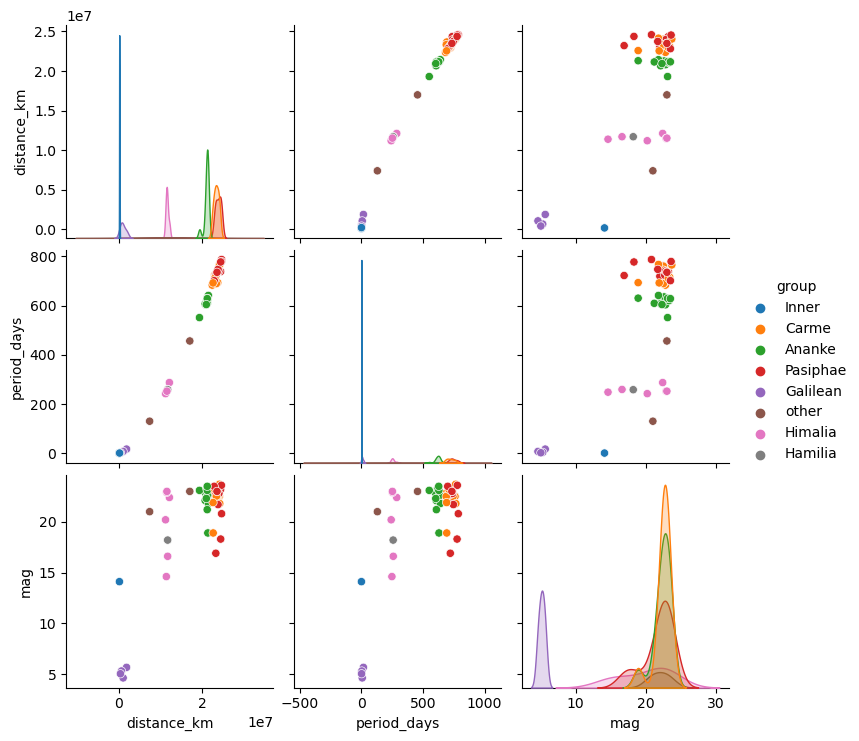

In [10]:
jupiter_moons.pair_plots(['distance_km', 'period_days','mag','group'], hue='group')

We can also use the "pair_plots" method allows to plot pairwise relationships between datasets. It has a nice visualisation and allows us to understand by summarising a large amount of data in a single figure:

As for the parameters: 
"attributes" is a list of features that we wish to analyse the trend with. 
"hue" is the name of the column which categorises the data, in this case it is "group". By default, it is set to None. 

When you want to include a hue, PLEASE include the name in the attributes list. If not, it would display an error. 

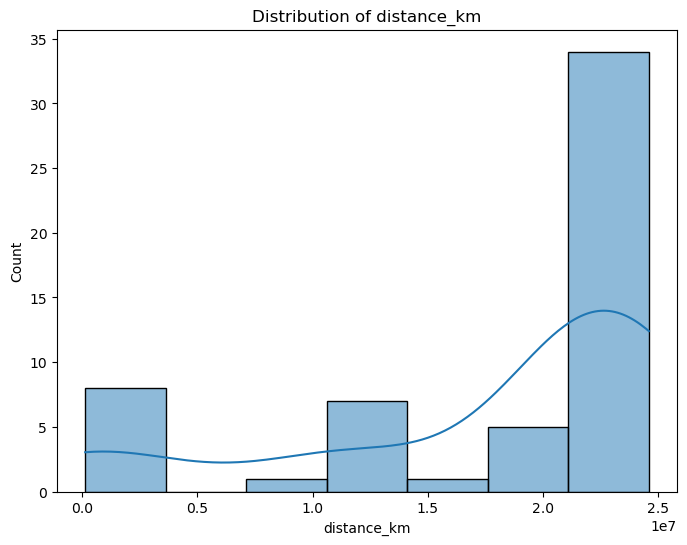

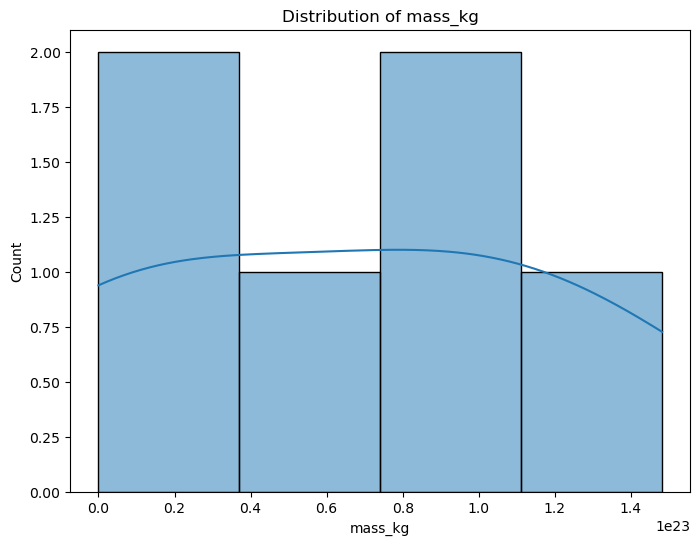

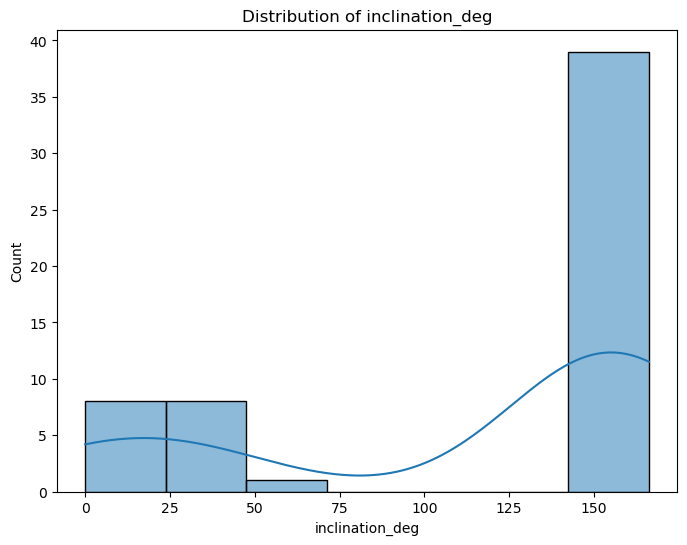

In [11]:
jupiter_moons.create_hist_plots(['distance_km', 'mass_kg', 'inclination_deg'])

The "create_hist_plots" function allows us to determine the distribution of the data. The only parameters required is the features that you want to explore. For example, for distance_km, it seems that most of the moons surrounded Jupiter is considerd to be very far away. 

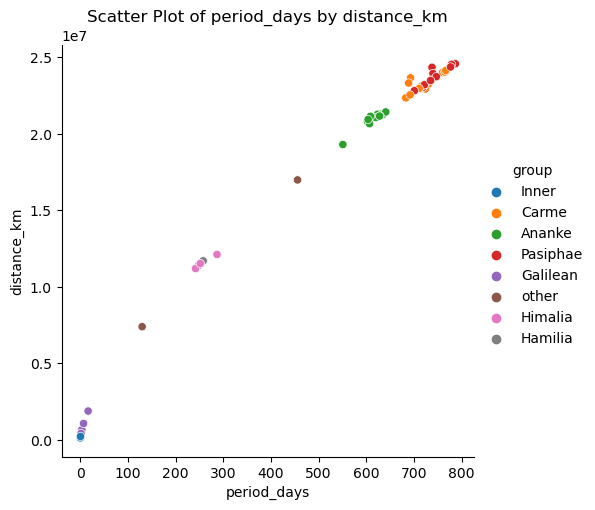

In [12]:
jupiter_moons.create_relplot("period_days","distance_km")

The method "create_relplot" allows us to visualise how variables interact with each other. 

The paramaters present are the x and y variable. 

From the graph above, it is very clear that "period_days" is proportional to "distance_km". (it's an almost straight line) 

As an added bonus, the points are coloured based on the groups. All the points are approximately around the same area - which is a good thing, which means that the moons are classified based on a certain characteristic. 

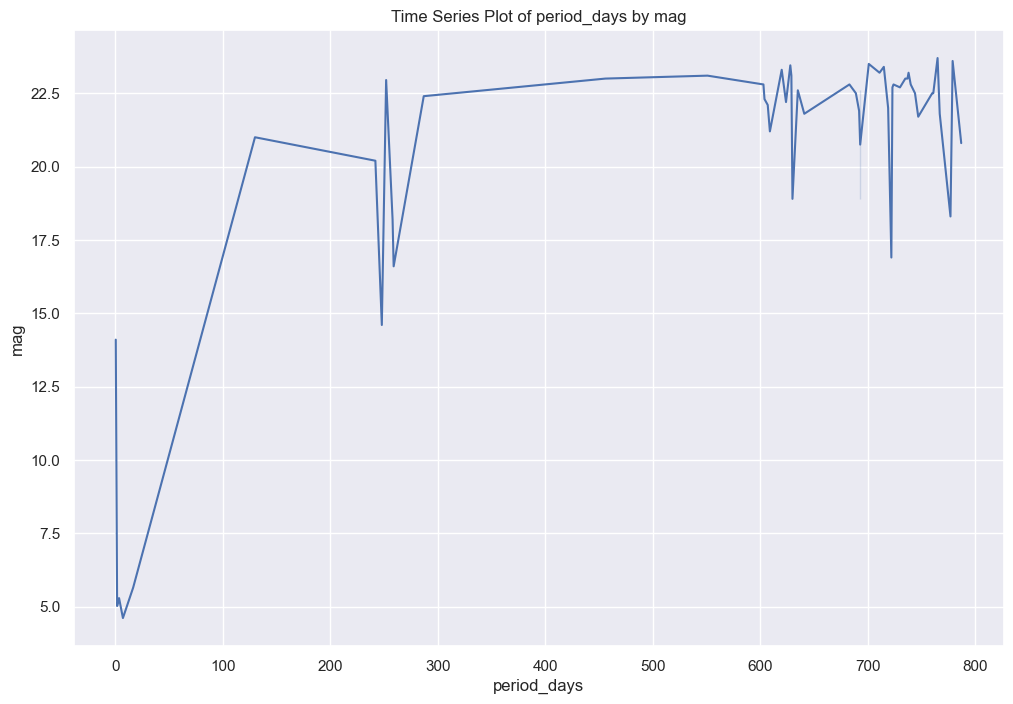

In [13]:
jupiter_moons.create_line_plot("period_days","mag")

Similar to the Scatter-Plot, we can also visualise trends using a line plot. 

In [14]:
moon_names_list = ['Callisto', 'Europa', 'Ganymede','Io']

jupiter_moons_extract = jupiter_moons.extract_moon_data(moon_names_list,'jupiter_database.db')

jupiter_moons_extract 

        moon  period_days  distance_km  radius_km   mag       mass_kg  \
8   Callisto    16.689018    1882700.0     2410.3  5.65  1.075938e+23   
22    Europa     3.551181     670900.0     1560.8  5.29  4.799844e+22   
24  Ganymede     7.150000    1070400.0     2634.1  4.61  1.481900e+23   
31        Io     1.750000     421700.0     1821.6  5.02  8.931938e+22   

       group     ecc  inclination_deg  
8   Galilean  0.0074             2.02  
22  Galilean  0.0090             1.79  
24  Galilean  0.0013             2.20  
31  Galilean  0.0041             2.20  


"Extract_moon_data" allows us to extract the features of particular moons. Here, I have extracted out the moons which are most commonly examined. 

The output is a Pandas Dataframe and it allows us to reuse it plot graphs as shown below, which can be very helpful if we want to analyse the trends of certain entries. 

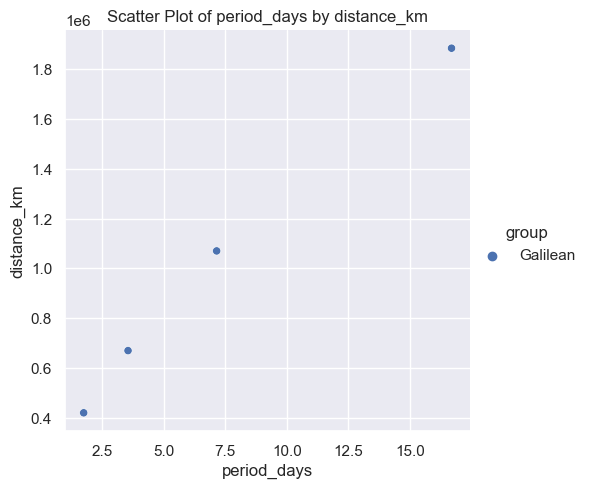

In [15]:
jupiter_moons_extract.create_relplot("period_days","distance_km")

# Task 2